Saving vgsales.csv to vgsales.csv
271
Media de Rank:
8290.190227733105
Desviación estándar de Rank:
4792.654449970838
Valor máximo de Rank:
16600
Valor mínimo de Rank:
1
--------------------------
Global_Sales normalizada: 52.44642277382901
Media de Global_Sales después de la normalización: 5.582804626928539e-17
Desviación estándar de Global_Sales después de la normalización: 1.0000306932061112
Valor máximo de Global_Sales después de la normalización: 52.44642277382901
Valor mínimo de Global_Sales después de la normalización: -0.3387427662665661


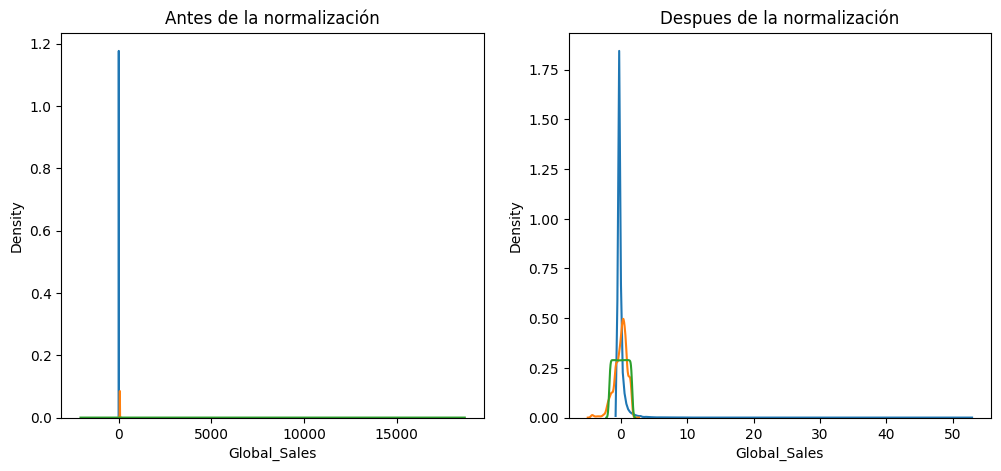

In [4]:
from google.colab import files
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

# Subir el archivo CSV desde tu computadora a Colab
uploaded = files.upload()

# Leer el archivo CSV cargado
import io
dato = pd.read_csv(io.BytesIO(uploaded['vgsales.csv']), on_bad_lines='skip')

# Verificar si hay valores nulos en la columna 'Year'
print(dato['Year'].isnull().sum())

# Eliminar filas con datos faltantes
dato.dropna(inplace=True)

# Convertir 'Year' a tipo entero
dato['Year'] = dato['Year'].astype(int)

# Agregar una nueva columna para definir los años en valores más simples
dato['year2'] = dato['Year'] - 1950

# Crear un nuevo DataFrame llamado df a partir de dato
df = pd.DataFrame(dato)

# Cálculos de Rank
print("Media de Rank:")
print(df['Rank'].mean())

print("Desviación estándar de Rank:")
print(df['Rank'].std())

print("Valor máximo de Rank:")
print(df['Rank'].max())

print("Valor mínimo de Rank:")
print(df['Rank'].min())

# Gráfico antes de la normalización
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title("Antes de la normalización")
sns.kdeplot(df['Global_Sales'], ax=ax1)
sns.kdeplot(df['year2'], ax=ax1)
sns.kdeplot(df['Rank'], ax=ax1)

# Normalización de las columnas year2, Global_Sales y Rank
scaler = preprocessing.StandardScaler()
df[['year2', 'Global_Sales', 'Rank']] = scaler.fit_transform(df[['year2', 'Global_Sales', 'Rank']])

# Cálculos de la columna Global_Sales después de la normalización
print("--------------------------")
print("Global_Sales normalizada:", df['Global_Sales'].iloc[0])
print("Media de Global_Sales después de la normalización:", df['Global_Sales'].mean())
print("Desviación estándar de Global_Sales después de la normalización:", df['Global_Sales'].std())
print("Valor máximo de Global_Sales después de la normalización:", df['Global_Sales'].max())
print("Valor mínimo de Global_Sales después de la normalización:", df['Global_Sales'].min())

# Gráfico después de la normalización
ax2.set_title("Despues de la normalización")
sns.kdeplot(df['Global_Sales'], ax=ax2)
sns.kdeplot(df['year2'], ax=ax2)
sns.kdeplot(df['Rank'], ax=ax2)

plt.show()
